# Compound Classification Challenge

This is a notebook for the challenge. For a simple demo, we will use Random Forest with the Morgan fingerprint as our feature vector.

In [1]:
!pip install rdkit
# !pip install torch-geometric
!pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 5.8 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_g

In [2]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import torch 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

Let's load the compound data file.

In [ ]:
cmpd_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Job_test/cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


In [ ]:
cmpd_df.shape

(5530, 4)

There are 5530 compound samples with:
* SMILES - 2D compound structure,
* InChIKey - a hash from InChI,
* group - a tag to split the dataset into train and test
* activity - y label

In [ ]:
cmpd_df['mol'] = cmpd_df.smiles.apply(Chem.MolFromSmiles)

NameError: ignored

In [ ]:
cmpd_df.head()

In [ ]:
cmpd_df.describe()

,inchikey,smiles,group,activity
count,5530,5530,5530,5530
unique,5489,5507,2,4
top,PHXJVRSECIGDHY-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
freq,4,3,3977,2704


In [ ]:
cmpd_df.dtypes

inchikey    object
smiles      object
group       object
activity    object
mol         object
dtype: object

In [ ]:
# with minimal modification, we obtain the fingerprint vector using RDKit

def get_Xy(df):
    X = np.vstack(df.mol.apply(lambda m: list(AllChem.GetMorganFingerprintAsBitVect(m, 4, nBits=2048))))
    y = df.activity.eq('active').astype(float).to_numpy()
    return X, y

In [ ]:
# with minimal modification, we obtain the fingerprint vector using RDKit

def get_Xy(df):
    X = df.values
    y = df.activity.eq('active').astype(float).to_numpy()
    return X, y

In [ ]:
X_train, y_train = get_Xy(cmpd_df[cmpd_df.group.eq('train')])
X_test, y_test = get_Xy(cmpd_df[cmpd_df.group.eq('test')])

'active'

In [ ]:
X_train, y_train = get_Xy(cmpd_df[cmpd_df.group.eq('train')])
X_test, y_test = get_Xy(cmpd_df[cmpd_df.group.eq('test')])

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train[2]

1.0

## Model: Random Forest

Probably, RF is the simplest classifier for numerical feature vectors without much tuning, and that gives us a start point of our model exploration.

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8583386992916935

In [ ]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [ ]:
# logloss
metrics.log_loss(y_test, y_pred, labels=[0, 1])

0.4228530832473805

In [ ]:
# AUC PRC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
metrics.auc(recall, precision)

0.8763044222851167

In [ ]:
# AUC ROC
fpr_roc, tpr_roc, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr_roc, tpr_roc)

0.8846382449883827

## Hints

Although AUCPRC and AUCROC are already quite high, one may suspect possible overfitting since the dimension of features is 2048, and the number of train samples is 3977. Indeed, it is the case, but a simple regularization with some hyperparam tuning of the RF and/or the Morgan fingerprint does not improve the result significantly. Note that some graph-based deep learning models with minimal tuning easily get you have both AUCPRC and AUCROC > 0.93, and logloss < 0.35.

Also, remember that you may freely use other open resources. For example, there are many many compound samples in PubChem, ChEMBL, ChEBI, ..., and most compounds there are not likely "active".

# **My work here**

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch_geometric
from torch_geometric.nn import GCNConv

In [5]:
# read the dataset
cmpd_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Job_test/cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


In [6]:
def prepare_data(df):
    train_df = df[df['group'] == "train"] 
    test_df = df[df['group'] == "test"] 
    train_labels = train_df.drop(columns=["group", "inchikey", "smiles"])
    test_labels = train_df.drop(columns=["group", "inchikey", "smiles"])
    train_labels.reset_index(inplace = True,drop = True)
    test_labels.reset_index(inplace = True,drop = True)
    # test_labels = test_df["activity"].reset_index(inplace = True,drop = True)
    train_df = train_df.drop(columns=["group", "activity"])
    train_df.reset_index(inplace = True,drop = True)
    test_df = test_df.drop(columns=["group", "activity"])
    test_df.reset_index(inplace = True,drop = True)

    train = list(train_df["smiles"])
    test = list(test_df["smiles"])
    tra_labels = list(train_labels["activity"])
    tes_labels = list(test_labels["activity"])

    return train_df, train, test_df, test, train_labels, test_labels, tra_labels, tes_labels

In [7]:
train_df, train, test_df, test, train_labels, test_labels, tra_labels, tes_labels = prepare_data(cmpd_df)
train_df.head()

,inchikey,smiles
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...
2,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2
3,IFPPYSWJNWHOLQ-UHFFFAOYSA-N,CCN(CC)CCOc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O...
4,WOSKHXYHFSIKNG-UHFFFAOYSA-N,COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C...


In [8]:
train_df['smiles'].isnull().sum()

0

Text(0.5, 1.0, 'Class distribution')

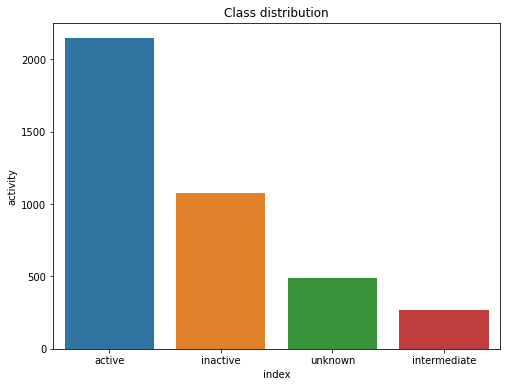

In [9]:
# Checking class distribution of training data

classes_dist = train_labels["activity"].value_counts().reset_index()
plt.figure(figsize=(8,6))
chart = sns.barplot(x="index", y="activity", data=classes_dist)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title("Class distribution")

In [10]:
test_df.count()

inchikey    1553
smiles      1553
dtype: int64

In [11]:
# Define the number of atom features
num_atom_features = 100

def create_graph(smiles, label=None):
    mol = Chem.MolFromSmiles(smiles)
    num_atoms = mol.GetNumAtoms()
    edge_index = []
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        edge_index.append([u, v])
        edge_index.append([v, u])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.zeros((num_atoms, num_atom_features))
    for i, atom in enumerate(mol.GetAtoms()):
        x[i, atom.GetAtomicNum()] = 1
    data = Data(x=x, edge_index=edge_index)
    if label is not None:
        data.y = torch.tensor([label], dtype=torch.long)
    return data

# def create_graph(smiles, label):
#     mol = Chem.MolFromSmiles(smiles)
#     num_atoms = mol.GetNumAtoms()
#     edge_index = []
#     for bond in mol.GetBonds():
#         u = bond.GetBeginAtomIdx()
#         v = bond.GetEndAtomIdx()
#         edge_index.append([u, v])
#         edge_index.append([v, u])
#     edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
#     x = torch.zeros((num_atoms, num_atom_features))
#     for i, atom in enumerate(mol.GetAtoms()):
#         x[i, atom.GetAtomicNum()] = 1
#     return Data(x=x, edge_index=edge_index, y=label)

In [12]:
# #convert labels into integer encodings
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tra_labels=le.fit_transform(tra_labels)
tes_labels = le.fit_transform(tes_labels)

tra_labels = list(tra_labels)
tes_labels = list(tes_labels)

# tra_labels = torch.from_numpy(np.array(tra_labels)).long()
# tes_labels = torch.from_numpy(np.array(tes_labels)).long()

In [13]:
# tra_labels

# tra_labels = torch.tensor(tra_labels, dtype=torch.long)
# tes_labels = torch.tensor(tes_labels, dtype=torch.long)

In [14]:
# tra_labels
# train

In [15]:
# Define a list of SMILES strings and their corresponding labels
# smiles_list = ['CCO', 'CCNC', 'CCCC', 'CCOC', 'CCOCC', 'CNCNC', 'CNCCN', 'CNCCC']
# label_list = [0, 1, 2, 3, 0, 1, 2, 3]

# Create graph data from the SMILES strings and labels
# train_data_list = [create_graph(smiles, label) for smiles, label in zip(train, tra_labels)]
train_data_list = [create_graph(train[i], tra_labels[i]) for i in range(len(train))]
# train_data_list

In [16]:
# Create graph data from the SMILES strings and labels
# test_data_list = [create_graph(smiles, label) for smiles, label in zip(test, tes_labels)]
test_data_list = [create_graph(test[i], tes_labels[i]) for i in range(len(test))]


In [20]:
# len(train_data_list)
# len(tra_labels)
train_data_list[0].x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [27]:
train_data_list[0].y

torch.Size([1])

In [382]:
# # For Training
# train_data_list = []
# for i in range(len(train)):
#     train_data_list.append(create_graph(train[i]))

In [383]:
# # For testing
# test_data_list = []
# for i in range(len(test)):
#     test_data_list.append(create_graph(test[i]))

In [384]:
# t = list(tra_labels)
# tt_labels = torch.tensor(t, dtype=torch.long)
# tt_labels
# train_data_list


In [385]:
# tt_labels.size()

In [386]:
# Create target labels tensor
# tra_labels = torch.tensor(tra_labels, dtype=torch.long)
# tes_labels = torch.tensor(tes_labels, dtype=torch.long)

In [387]:
# def collate_fn(data):
#     batch_smiles = [item[0] for item in data]
#     batch_labels = [item[1] for item in data]
#     batch_data = [create_graph(smiles) for smiles in batch_smiles]
#     return batch_data, batch_labels

# train_loader = DataLoader(
#     dataset=train_data_list,
#     batch_size=16,
#     shuffle=True,
#     collate_fn=collate_fn
# )

In [358]:
# Create a PyTorch DataLoader for the graph data and labels
train_loader = DataLoader(train_data_list, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data_list, batch_size=16, shuffle=False)

In [28]:
# batch = next(iter(loader))

In [350]:
# Define a GCN model architecture
# class GCN(torch.nn.Module):
#     def __init__(self, num_features, hidden_channels, num_classes):
#         super(GCN, self).__init__()
#         self.conv1 = torch_geometric.nn.GCNConv(num_features, hidden_channels)
#         self.conv2 = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
#         self.conv3 = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
#         self.fc = torch.nn.Linear(hidden_channels, num_classes)
        
#     def forward(self, x, edge_index):
#         x = self.conv1(x, edge_index)
#         x = torch.relu(x)
#         x = self.conv2(x, edge_index)
#         x = torch.relu(x)
#         x = self.conv3(x, edge_index)
#         x = torch.relu(x)
#         # x = torch_geometric.nn.global_mean_pool(x, torch.zeros(x.size(0), dtype=torch.long))
#         # x = torch_geometric.nn.global_mean_pool(x, batch=None)
#         x = self.fc(x)
#         return x


# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_atom_features, 16)
        self.conv2 = GCNConv(16, 4)

    # def forward(self, x, edge_index):
    #     x = F.relu(self.conv1(x, edge_index))
    #     x = F.dropout(x, training=self.training)
    #     x = self.conv2(x, edge_index)
    #     return F.log_softmax(x, dim=1)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [351]:
# Initialize the model
num_atom_features = 100
model = GCN()

In [352]:
# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [355]:
# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x.float(), data.edge_index)
        # out = out.view(-1, 4)
        # target = data.y.view(-1)
        # print("target shape: ", data.y.shape)
        # print("out shape: ", out.shape)
        loss = criterion(out, data.y)
        # print(out.size())
        
        # break
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss))



ValueError: ignored

In [ ]:
# train_dataset = list(zip(data_list, tra_labels))
# test_dataset = list(zip(test_data_list, te_labels))

In [ ]:
# Create PyTorch DataLoader objects for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define a GCN model architecture
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = torch_geometric.nn.GCNConv(num_features, hidden_channels)
        self.conv2 = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
        self.conv3 = torch_geometric.nn.GCNConv(hidden_channels, hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, num_classes)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.conv3(x, edge_index)
        x = torch.relu(x)
        # x = torch_geometric.nn.global_mean_pool(x, torch.zeros(x.size(0), dtype=torch.long))
        x = torch_geometric.nn.global_mean_pool(x, batch=None)
        x = self.fc(x)
        return x

In [ ]:
# Initialize the model
model = GCN(num_features=num_atom_features, hidden_channels=128, num_classes=4)

RuntimeError: ignored

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
from torch_geometric.data import Data
from rdkit import Chem

# Define the number of atom features
num_atom_features = 100

# Define a function to create graph data from SMILES strings
def create_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    num_atoms = mol.GetNumAtoms()
    edge_index = []
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        edge_index.append([u, v])
        edge_index.append([v, u])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.zeros((num_atoms, num_atom_features))
    for i, atom in enumerate(mol.GetAtoms()):
        x[i, atom.GetAtomicNum()] = 1
    return Data(x=x, edge_index=edge_index)

# Define a custom SMILES list
smiles_list = ['CCO', 'CCCCC', 'CCNC', 'CC(=O)O', 'COC(=O)CC', 'CN(C)C', 'C1=CC=CC=C1']

# Convert each SMILES string to a graph data object
data_list = [create_graph(smiles) for smiles in smiles_list]


In [ ]:
data_list

[Data(x=[3, 100], edge_index=[2, 4]),
 Data(x=[5, 100], edge_index=[2, 8]),
 Data(x=[4, 100], edge_index=[2, 6]),
 Data(x=[4, 100], edge_index=[2, 6]),
 Data(x=[6, 100], edge_index=[2, 10]),
 Data(x=[4, 100], edge_index=[2, 6]),
 Data(x=[6, 100], edge_index=[2, 12])]

In [ ]:
# Define a binary classification task
label_list = [0, 1, 0, 1, 0, 1, 0] # 0 indicates non-active, 1 indicates active


In [ ]:
# Create a PyTorch DataLoader for the graph data and labels
data_loader = DataLoader(data_list, batch_size=4)
label_tensor = torch.tensor(label_list, dtype=torch.long)

In [ ]:
# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_atom_features, 16)
        self.conv2 = GCNConv(16, 2)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
# Define the GCN model, loss function, and optimizer
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train the GCN on the graph data and labels
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch in data_loader:
        optimizer.zero_grad()
        out = model(batch.x.float(), batch.edge_index)
        # print(label_tensor[batch.batch].shape)
        # print(label_tensor[batch.batch])
        # print(label_tensor.shape)
        # print(out.size())
        # break
        loss = criterion(out, label_tensor[batch.batch])
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss))


Epoch [1/100], Loss: 1.4160
Epoch [2/100], Loss: 1.3634
Epoch [3/100], Loss: 1.3439
Epoch [4/100], Loss: 1.3160
Epoch [5/100], Loss: 1.3514
Epoch [6/100], Loss: 1.3683
Epoch [7/100], Loss: 1.2524
Epoch [8/100], Loss: 1.4075
Epoch [9/100], Loss: 1.3279
Epoch [10/100], Loss: 1.3448
Epoch [11/100], Loss: 1.3960
Epoch [12/100], Loss: 1.4043
Epoch [13/100], Loss: 1.2588
Epoch [14/100], Loss: 1.3772
Epoch [15/100], Loss: 1.3392
Epoch [16/100], Loss: 1.3416
Epoch [17/100], Loss: 1.3309
Epoch [18/100], Loss: 1.4240
Epoch [19/100], Loss: 1.3277
Epoch [20/100], Loss: 1.3477
Epoch [21/100], Loss: 1.3786
Epoch [22/100], Loss: 1.3579
Epoch [23/100], Loss: 1.3262
Epoch [24/100], Loss: 1.3424
Epoch [25/100], Loss: 1.3563
Epoch [26/100], Loss: 1.3831
Epoch [27/100], Loss: 1.3755
Epoch [28/100], Loss: 1.2859
Epoch [29/100], Loss: 1.3058
Epoch [30/100], Loss: 1.3794
Epoch [31/100], Loss: 1.3913
Epoch [32/100], Loss: 1.3537
Epoch [33/100], Loss: 1.3361
Epoch [34/100], Loss: 1.3632
Epoch [35/100], Loss: 1

In [ ]:
# Test the trained model on new graph data
test_smiles = 'CCO'
test_data = create_graph(test_smiles)
test_out = model(test_data.x.float().unsqueeze(0), test_data.edge_index)
test_pred = torch.mean(torch.softmax(test_out, dim=-1), dim=1)
test_pred = torch.argmax(test_pred, dim=1).item()
# test_pred = torch.argmax(test_out, dim=1)
print(test_pred)

# test_pred = torch.argmax(test_out, dim=1)[0].item()
print('Prediction for {}: {}'.format(test_smiles, test_pred))

1
Prediction for CCO: 1


# **Experimenation here**

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch.utils.data import Dataset, DataLoader
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolFromSmiles

class MolDataset(Dataset):
    def __init__(self, smiles_list, target_list):
        self.smiles_list = smiles_list
        self.target_list = target_list

    def __len__(self):
        return len(self.smiles_list)

    def __getitem__(self, idx):
        mol = MolFromSmiles(self.smiles_list[idx])
        x = torch.tensor(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048), dtype=torch.float)
        y = torch.tensor(self.target_list[idx], dtype=torch.long)
        return x, y

In [ ]:
# Prepare data
# smiles_list = ['CCO', 'CC1=CC=CC=C1C(=O)O', 'CCC(=O)O']
# train_df
data_list
# target_list = [0, 1, 2]


AttributeError: ignored

In [ ]:
dataset = MolDataset(smiles_list, target_list)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
for i in train_loader:
  print(i)

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]]), tensor([1, 0, 2])]


In [ ]:
# cmpd_df["smiles"]

0       CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
1       CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...
2       Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...
3            COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2
4       Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...
                              ...                        
5525    Cc1cccc2nc(-c3ccc(-c4cccc(CN5CCC(C(N)=O)CC5)c4...
5526          Cc1c2ccccc2nc2c1c1cc(NCCN(C)C)ccc1n2CCN(C)C
5527    Cc1ccc(-c2ccn(-c3ccc4c5c(n(C)c4c3)CCCNC5)c(=O)...
5528    N#Cc1c(-c2ccccc2C(F)(F)F)nc(SCc2ccc(OC(F)(F)F)...
5529    CCOP(=O)(OCC)[C@@H]1C[C@H](C(=O)Nc2cc3c4c(cccc...
Name: smiles, Length: 5530, dtype: object

In [ ]:
# Define a function to convert a SMILES string to a graph
def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    AllChem.Compute2DCoords(mol)
    num_atoms = mol.GetNumAtoms()
    edge_index = []
    for bond in mol.GetBonds():
        i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        edge_index.append([i, j])
        edge_index.append([j, i])
    edge_index = torch.tensor(edge_index).t().contiguous()
    x = torch.tensor(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))
    return Data(x=x, edge_index=edge_index)


In [ ]:
# Convert the SMILES strings to graphs and discard any molecules that couldn't be processed
graphs = [smiles_to_graph(smiles) for smiles in cmpd_df["smiles"]]
graphs = [graph for graph in graphs if graph is not None]

In [ ]:
# graphs

In [ ]:
# Define a function to assign labels to the graphs
def assign_labels(graphs, df):
    inchikey_to_label = dict(zip(df['inchikey'], df['activity']))
    for graph in graphs:
        inchikey = Chem.InchiToInchiKey(Chem.MolToInchi(Chem.MolFromSmiles(df["smiles"])))
        graph.y = torch.tensor([inchikey_to_label[inchikey]])
    return graphs

In [ ]:
# Assign labels to the graphs
graphs = assign_labels(graphs, cmpd_df)

TypeError: ignored

In [ ]:
# Define the number of atom features
num_atom_features = 100

# Define a function to create graph data from SMILES strings
def create_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    num_atoms = mol.GetNumAtoms()
    edge_index = []
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        edge_index.append([u, v])
        edge_index.append([v, u])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.zeros((num_atoms, num_atom_features))
    for i, atom in enumerate(mol.GetAtoms()):
        x[i, atom.GetAtomicNum()] = 1
    return Data(x=x, edge_index=edge_index)

In [ ]:
data_list = []
for i in range(len(cmpd_df)):
    data_list.append(create_graph(cmpd_df.smiles[i]))